In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
comentarios = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bolsonaro_texto.csv", delimiter = ';', encoding='iso-8859-1')

In [17]:
comentarios.dropna()

,comment_message
0,Bruno Aquino kkk
1,Eu tiraria o Flavio ein kkkk... Ainda ta mal c...
2,Bruno Aquino
3,Só esqueceu que não há mais reeleição pra pres...
4,Bruno Aquino - tu soh pode ser demente!!!
5,Bruno Aquino Qualquer um deles pode ficar 4 ...
6,"Bruno Aquino - em um ano, o flavio jah deve es..."
7,Bruno Aquino E que Deus seja Louvado.
8,E só intercalar #Flavio2022 #Eduardo2026 #ca...
9,Lula livre 2100


In [0]:
comentarios = [e for e in comentarios['comment_message'] if isinstance(e, str)]
comentarios = pd.DataFrame(comentarios)

In [0]:
vectorizer = TfidfVectorizer() # variar parametros (L1/L2, etc)
X = vectorizer.fit_transform(comentarios[0])
X = normalize(X)

In [0]:
text = ['www.facebook.com/groups/787853001558289/']


In [47]:
X_new = vectorizer.transform(text)
comentarios['coseno'] = cosine_similarity(X_new, X)[0]
print(comentarios.sort_values(by = 'coseno'))

                                                       0    coseno
0                                       Bruno Aquino kkk  0.000000
8069   Esse papinho de tudo é culpa do PT já deu irmã...  0.000000
8070   Mario Xavier agora aguarda próxima eleição  e ...  0.000000
8071   Bolsonaro será o maior presidente que o Brasil...  0.000000
8072   Maria Fortunato Wronski outra petralhinha doen...  0.000000
8073   Meu amigo, respeito sua opinião, realmente voc...  0.000000
8074   Maria Fortunato Wronski onde vc viu isso. A re...  0.000000
8075   Breno Leonel ele é petista véi...jamais vai ad...  0.000000
8076   Mario Xavier era melhor vc ficar acreditando e...  0.000000
8068                                 Vá na minha página!  0.000000
8077   Gente quem já está trabalhando continua o mesm...  0.000000
8081   Mario Xavier não dá pra ter tudo na vida não f...  0.000000
8083     É o que passa no congresso ... Não há ideal ...  0.000000
8084   Webston Fernandes Jr. Não tem como passar para...  0.00

In [48]:
comentarios[comentarios['coseno']>0.3]

,0,coseno
2713,https://www.facebook.com/groups/chumbogrosso/p...,0.383391
2861,https://www.facebook.com/1889840344633234/post...,0.311126
2881,https://www.facebook.com/nadiagalst/videos/102...,0.311123
3368,https://www.facebook.com/1889840344633234/post...,0.311126
4429,Neide Alexandre VOCÊ APOIA JAIR MESSIAS BOLSA...,0.501337
4430,Catia Guimarães VOCÊ APOIA JAIR MESSIAS BOLSA...,0.451372
4431,Willian Nardi VOCÊ APOIA JAIR MESSIAS BOLSANA...,0.460093
4432,Taiane Lobo VOCÊ APOIA JAIR MESSIAS BOLSANARO...,0.449682
4561,Monica Michel Teixeira VOCÊ APOIA JAIR MESSIA...,0.464188
4562,Sirlene Oliveira Silva VOCÊ APOIA JAIR MESSIA...,0.468335


In [0]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import re
import operator
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# If you would like to work with the raw text you can use 'moby_raw'
with open('/content/drive/My Drive/Colab Notebooks/bolsonaro_texto.csv',  encoding='iso-8859-1',) as f:
    moby_raw = f.read()
    
# If you would like to work with the novel in nltk.Text format you can use 'text1'
moby_tokens = nltk.word_tokenize(moby_raw)
text1 = nltk.Text(moby_tokens)

In [42]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [0]:
texto = [w.lower() for w in webtext.words('/content/drive/My Drive/Colab Notebooks/bolsonaro_texto.csv')]

In [0]:
procurar = BigramCollocationFinder.from_words(moby_tokens)

In [45]:
procurar.nbest(BigramAssocMeasures.likelihood_ratio, 30)

[('?', '?'),
 ('!', '!'),
 ('https', ':'),
 ('Bom', 'dia'),
 ('``', "''"),
 ('JAIR', 'MESSIAS'),
 ('VOCÊ', 'APOIA'),
 ('MESSIAS', 'BOLSANARO'),
 ('CLIQUE', 'AQUI'),
 ('APOIA', 'JAIR'),
 ("''", "''"),
 ('da', 'previdência'),
 ('JUNTE-SE', 'A'),
 (':', '//www.facebook.com/groups/787853001558289/'),
 ('A', 'NÓS'),
 ('Jair', 'Messias'),
 ('se', 'aposentar'),
 ('acabar', 'com'),
 (',', 'mas'),
 ('reforma', 'da'),
 ('65', 'anos'),
 ('Mario', 'Xavier'),
 ('Messias', 'Bolsonaro'),
 ('?', ','),
 (',', '?'),
 ('meu', 'presidente'),
 ('.', 'CLIQUE'),
 ('tem', 'que'),
 ('NÓS', '.'),
 ('seus', 'filhos')]

In [0]:
from nltk.corpus import stopwords

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
retira = set(stopwords.words('portuguese'))

In [0]:
filtra = lambda w: len(w) <3 or w in retira

In [0]:
procurar.apply_word_filter(filtra)

In [55]:
procurar.nbest(BigramAssocMeasures.likelihood_ratio, 30)

[('Bom', 'dia'),
 ('JAIR', 'MESSIAS'),
 ('VOCÊ', 'APOIA'),
 ('MESSIAS', 'BOLSANARO'),
 ('CLIQUE', 'AQUI'),
 ('APOIA', 'JAIR'),
 ('Jair', 'Messias'),
 ('Mario', 'Xavier'),
 ('Messias', 'Bolsonaro'),
 ('Neide', 'Alexandre'),
 ('Evandro', 'Morais'),
 ('Carvallho', 'Pindorama'),
 ('Magno', 'Malta'),
 ('Adrielle', 'Carvallho'),
 ('Valdete', 'Ladislau'),
 ('idade', 'mínima'),
 ('Por', 'favor'),
 ('redes', 'sociais'),
 ('Deus', 'abençoe'),
 ('Tacia', 'Cabalieri'),
 ('povo', 'brasileiro'),
 ('salário', 'mínimo'),
 ('Muito', 'bom'),
 ('Paulo', 'Guedes'),
 ('auto', 'escola'),
 ('AÇO', 'AÇO'),
 ('Sérgio', 'Moro'),
 ('Monica', 'Michel'),
 ('Sr.', 'Presidente'),
 ('Leonardo', 'Chagas')]

In [0]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

In [0]:
procurar2 = TrigramCollocationFinder.from_words(moby_tokens)

In [58]:
procurar2.nbest(TrigramAssocMeasures.likelihood_ratio, 30)

[('?', '?', '?'),
 (',', '?', '?'),
 ('?', '?', ','),
 ('?', '?', '.'),
 ('?', '?', 'de'),
 ('que', '?', '?'),
 ('?', '?', 'que'),
 ('AQUI', '?', '?'),
 ('e', '?', '?'),
 ('?', '?', 'e'),
 ('o', '?', '?'),
 ('?', '?', 'o'),
 ('?', '?', '!'),
 ('.', '?', '?'),
 ('?', '?', 'A'),
 ('?', '?', 'a'),
 (':', '?', '?'),
 ('?', '?', 'https'),
 ('do', '?', '?'),
 ('?', '?', 'não'),
 ('?', '?', 'do'),
 ('?', '?', 'é'),
 ('não', '?', '?'),
 ('com', '?', '?'),
 ('é', '?', '?'),
 ('?', '?', 'com'),
 ('?', '?', 'para'),
 ('da', '?', '?'),
 ('?', '?', 'da'),
 ('um', '?', '?')]

In [0]:
filtra2 = lambda w: len(w) <3 or w in retira

In [0]:
procurar2.apply_word_filter(filtra2)

In [61]:
procurar2.nbest(TrigramAssocMeasures.likelihood_ratio, 30)

[('APOIA', 'JAIR', 'MESSIAS'),
 ('JAIR', 'MESSIAS', 'BOLSANARO'),
 ('VOCÊ', 'APOIA', 'JAIR'),
 ('Bom', 'dia', 'presidente'),
 ('Bom', 'dia', 'Presidente'),
 ('//www.facebook.com/groups/787853001558289/', 'Bom', 'dia'),
 ('Bom', 'dia', 'Capitão'),
 ('Bom', 'dia', 'PRESIDENTE'),
 ('Bom', 'dia', 'Sr.'),
 ('Bom', 'dia', 'Presidente.'),
 ('Bom', 'dia', 'Senhor'),
 ('Muito', 'Bom', 'dia'),
 ('presidente', 'Bom', 'dia'),
 ('Bom', 'dia', 'abençoado'),
 ('Bom', 'dia', 'senhor'),
 ('Presidente', 'Bom', 'dia'),
 ('//blogdacidadania.com.br/2019/02/usp-cancela-matriculas-de-estudantes-de-colegios-militares-aprovados-pelo-sisu/',
  'Bom',
  'dia'),
 ('//economia.uol.com.br/noticias/efe/2019/02/15/china-confirma-medidas-antidumping-sobre-importacao-de-frango-brasileiro.htm',
  'Bom',
  'dia'),
 ('//www.facebook.com/vcnaoetodomundo/videos/292892894754967/', 'Bom', 'dia'),
 ('Bolsonaro2030', 'Bom', 'dia'),
 ('Bom', 'dia', 'Capitäo'),
 ('Bom', 'dia', 'Presidente.Deus'),
 ('Bom', 'dia', 'mitoo'),
 ('Bom'

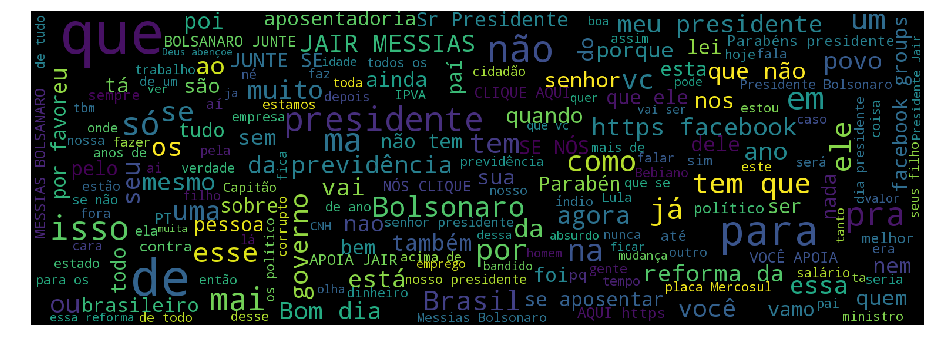

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
text = open('/content/drive/My Drive/Colab Notebooks/bolsonaro_texto.csv', encoding='iso-8859-1').read()
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import re
import operator
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words

# If you would like to work with the raw text you can use 'moby_raw'
with open('/content/drive/My Drive/Colab Notebooks/bolsonaro_texto.csv',  encoding='iso-8859-1',) as f:
    moby_raw = f.read()
    
# If you would like to work with the novel in nltk.Text format you can use 'text1'
moby_tokens = nltk.word_tokenize(moby_raw)
text1 = nltk.Text(moby_tokens)

In [66]:
def example_two():
    
    return len(set(nltk.word_tokenize(moby_raw))) # or alternatively len(set(text1))

example_two()

24215

In [68]:
def answer_three():
    dist = nltk.FreqDist(text1)
    sorted_x = sorted(dist.items(),key=operator.itemgetter(1))
    sorted_x.reverse()
    
    return sorted_x[:100]

answer_three()

[('?', 24362),
 (',', 10064),
 ('.', 8386),
 ('!', 6250),
 ('que', 6191),
 ('de', 6169),
 ('o', 5551),
 ('e', 5278),
 ('a', 4650),
 ('não', 2962),
 ('é', 2782),
 ('do', 2607),
 ('com', 2443),
 ('...', 2163),
 ('para', 2123),
 ('da', 1815),
 ('um', 1675),
 ('os', 1665),
 ("''", 1638),
 ('se', 1619),
 ('no', 1541),
 ('em', 1534),
 ('presidente', 1474),
 ('mais', 1333),
 ('Presidente', 1282),
 ('tem', 1245),
 ('pra', 1223),
 ('uma', 1194),
 ('por', 1098),
 ('anos', 1061),
 ('na', 1052),
 ('Bolsonaro', 989),
 ('O', 979),
 ('as', 965),
 ('isso', 944),
 ('vai', 940),
 ('E', 930),
 (':', 866),
 ('A', 815),
 ('ser', 786),
 ('dos', 778),
 ('como', 744),
 ('#', 732),
 ('Brasil', 712),
 ('só', 661),
 ('ele', 647),
 ('mas', 640),
 ('já', 638),
 ('está', 633),
 ('essa', 617),
 ('muito', 605),
 ('``', 599),
 ('reforma', 593),
 ('meu', 581),
 ('vc', 563),
 ('governo', 543),
 ('https', 543),
 ('povo', 542),
 ('Deus', 533),
 ('q', 531),
 ('todos', 527),
 ('ter', 518),
 ('dia', 516),
 ('Parabéns', 513),

In [69]:
def answer_four():
    dist = nltk.FreqDist(text1)
    vocab1 = dist.keys()
    freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 150]
    return sorted(freqwords)

answer_four()

['//www.facebook.com/groups/787853001558289/',
 'BOLSANARO',
 'Bolsonaro',
 'Brasil',
 'CLIQUE',
 'Carlos',
 'JUNTE-SE',
 'MESSIAS',
 'Mercosul',
 'PRESIDENTE',
 'Parabéns',
 'Presidente',
 'Senhor',
 'absurdo',
 'acabar',
 'aposentadoria',
 'aposentar',
 'brasileiro',
 'campanha',
 'contra',
 'dinheiro',
 'filhos',
 'governo',
 'melhor',
 'ninguém',
 'pessoas',
 'placas',
 'políticos',
 'porque',
 'precisa',
 'presidente',
 'previdência',
 'quando',
 'reforma',
 'sempre',
 'senhor',
 'também',
 'trabalhar',
 'trabalho',
 'verdade',
 'índios']